# LUNG CANCER PREDICTION WITH RANDOM FOREST

**Attribute information:**
1. Gender: M(male), F(female)
2. Age: Age of the patient
3. Smoking: YES=2 , NO=1.
4. Yellow fingers: YES=2 , NO=1.
5. Anxiety: YES=2 , NO=1.
6. Peer_pressure: YES=2 , NO=1.
7. Chronic Disease: YES=2 , NO=1.
8. Fatigue: YES=2 , NO=1.
9. Allergy: YES=2 , NO=1.
10. Wheezing: YES=2 , NO=1.
11. Alcohol: YES=2 , NO=1.
12. Coughing: YES=2 , NO=1.
13. Shortness of Breath: YES=2 , NO=1.
14. Swallowing Difficulty: YES=2 , NO=1.
15. Chest pain: YES=2 , NO=1.
16. Lung Cancer: YES , NO.

**Importing libraries and modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from IPython.display import HTML

**Reading and understanding data..**

In [3]:
lung_cancer = pd.read_csv('Excel Files/lung-cancer.csv')
lung_cancer.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
lung_cancer.count()

GENDER                   309
AGE                      309
SMOKING                  309
YELLOW_FINGERS           309
ANXIETY                  309
PEER_PRESSURE            309
CHRONIC DISEASE          309
FATIGUE                  309
ALLERGY                  309
WHEEZING                 309
ALCOHOL CONSUMING        309
COUGHING                 309
SHORTNESS OF BREATH      309
SWALLOWING DIFFICULTY    309
CHEST PAIN               309
LUNG_CANCER              309
dtype: int64

In [7]:
lung_cancer.drop_duplicates(inplace= True)

In [8]:
lung_cancer.count()

GENDER                   276
AGE                      276
SMOKING                  276
YELLOW_FINGERS           276
ANXIETY                  276
PEER_PRESSURE            276
CHRONIC DISEASE          276
FATIGUE                  276
ALLERGY                  276
WHEEZING                 276
ALCOHOL CONSUMING        276
COUGHING                 276
SHORTNESS OF BREATH      276
SWALLOWING DIFFICULTY    276
CHEST PAIN               276
LUNG_CANCER              276
dtype: int64

In [9]:
lung_cancer['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

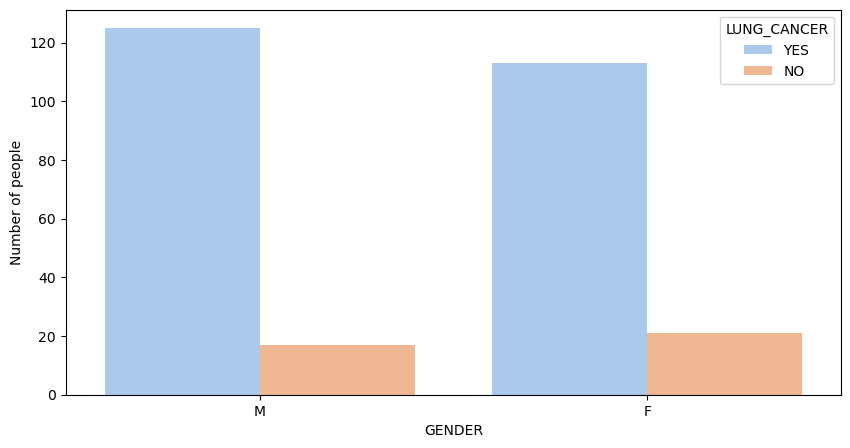

In [10]:
# hue - divides the value in different categories
plt.figure(figsize=(10,5))
sns.countplot(data=lung_cancer, x='GENDER', hue='LUNG_CANCER', palette='pastel');
plt.ylabel('Number of people');

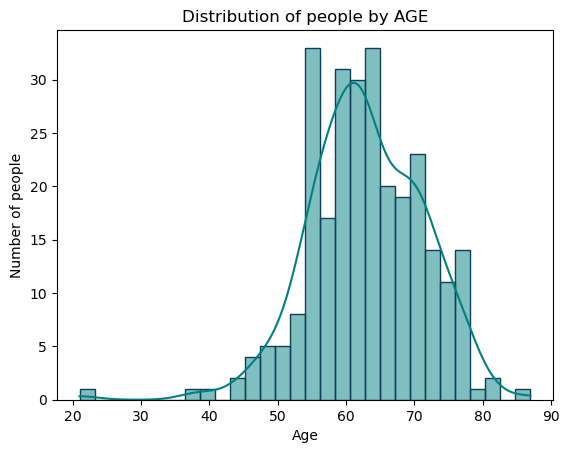

In [12]:
age_hist= sns.histplot(lung_cancer['AGE'],bins=30 ,kde=True,color='teal', edgecolor ='#0f3d5c')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of people by AGE')
plt.show()
fig = age_hist.get_figure()
fig.savefig('age_hist.png')

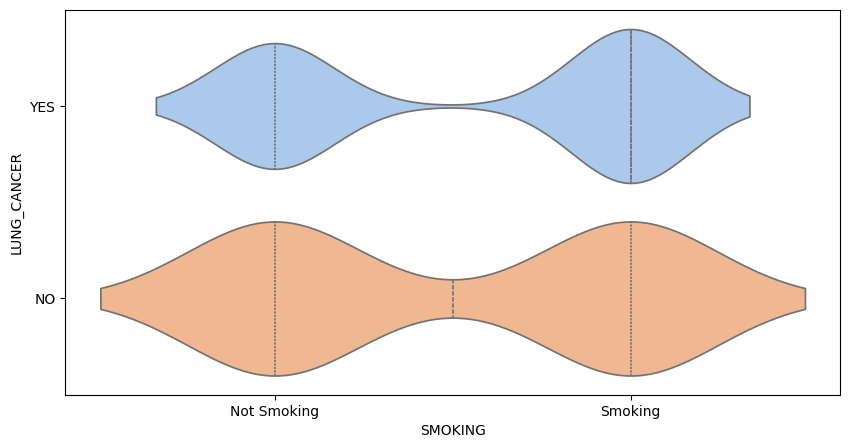

In [15]:
plt.figure(figsize=(10,5))
violin_smoking_cancer = sns.violinplot(data = lung_cancer, x='SMOKING', y='LUNG_CANCER', hue='LUNG_CANCER', inner='quart', legend=False, palette='pastel');
plt.xticks([1,2],['Not Smoking','Smoking'])
fig = violin_smoking_cancer.get_figure()
fig.savefig('violin_SM_C.png')


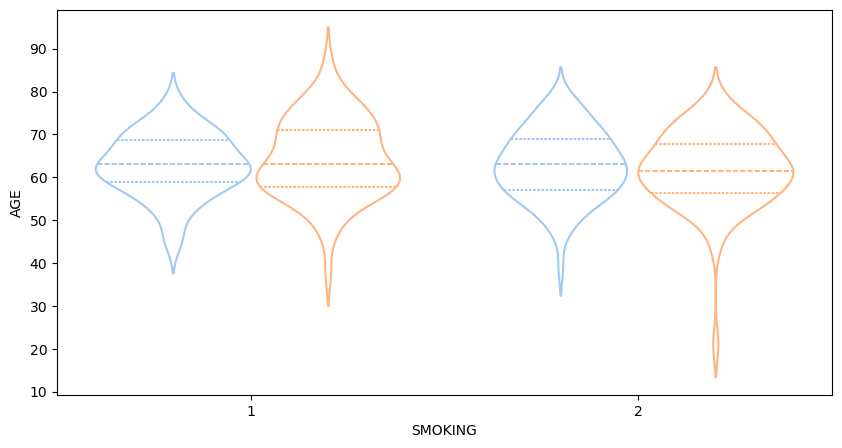

In [72]:
plt.figure(figsize=(10,5))
violin_SM_A = sns.violinplot(data = lung_cancer, x='SMOKING', y='AGE', hue='GENDER', fill=False, inner='quart',legend =False, palette='pastel');
fig = violin_SM_A.get_figure()
fig.savefig('violin_SM_A.png')

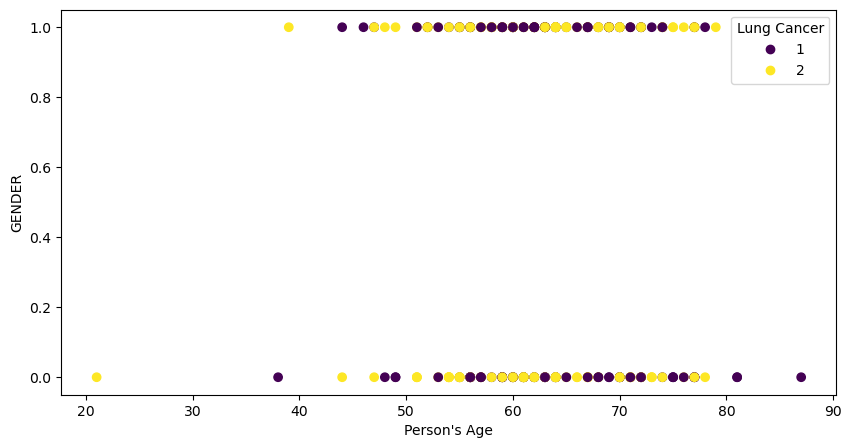

In [99]:
fix, ax = plt.subplots(figsize=(10,5))

scatter = ax.scatter(x=lung_cancer['AGE'],
           y=lung_cancer['GENDER'],
           c=lung_cancer['SMOKING'])

ax.set(xlabel="Person's Age",
       ylabel ='GENDER',
       title='')
ax.legend(*scatter.legend_elements(),title='Lung Cancer');

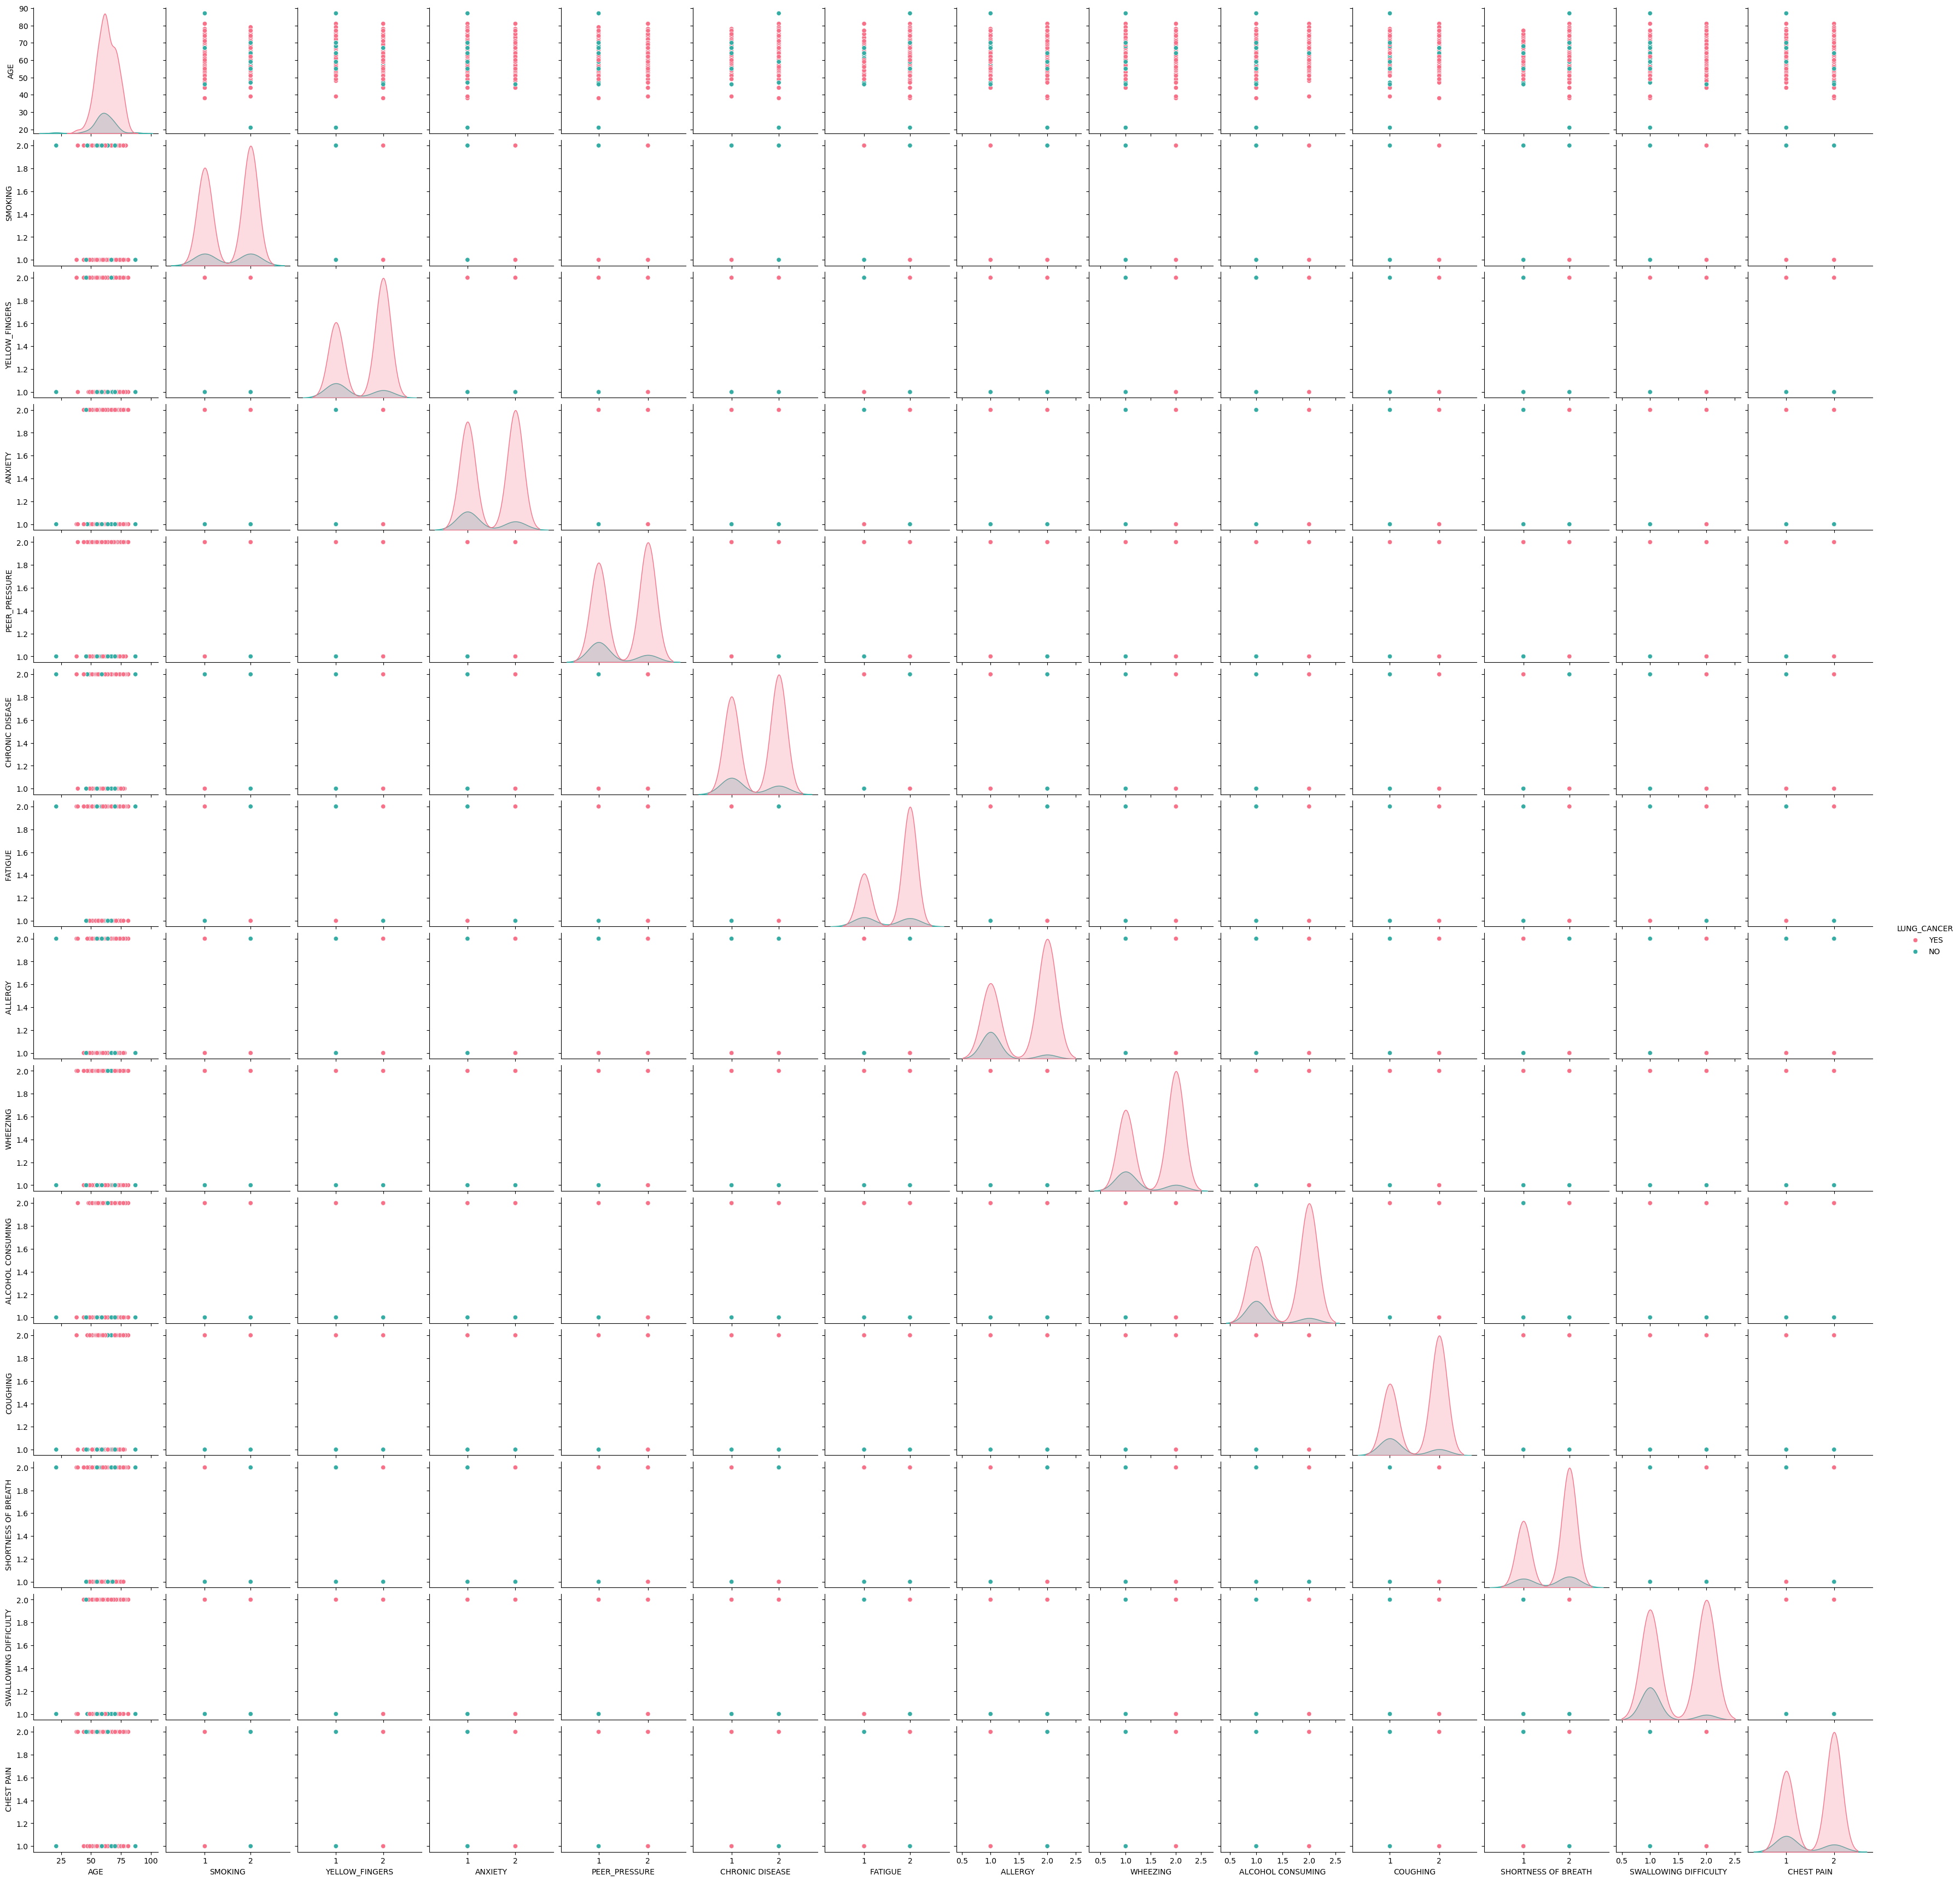

In [17]:
sns.pairplot(lung_cancer, hue="LUNG_CANCER", diag_kind="kde", palette="husl")


In [79]:
lung_cancer['GENDER'] = lung_cancer['GENDER'].map({'M':1,'F':0})
lung_cancer['LUNG_CANCER'] = lung_cancer['LUNG_CANCER'].map({'YES':1,'NO':0})

## Another way to change the categorical values to numerical values
## GENDER 1 - MALE, 0 - FEMALE
#lung_cancer['GENDER'] = [1 if label == 'M' else 0 for label in lung_cancer['GENDER']]
## lung cancer 1 - YES, 0 - NO
#lung_cancer['LUNG_CANCER'] = [1 if label == 'YES' else 0 for label in lung_cancer['LUNG_CANCER']]

In [80]:
lung_cancer[['GENDER','LUNG_CANCER']].head(5)

,GENDER,LUNG_CANCER
0,1,1
1,1,1
2,0,0
3,1,0
4,0,0


In [82]:
lung_cancer['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

In [84]:
lung_cancer.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [12]:
lung_cancer.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [85]:
lung_cancer.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


## Creating a machine learning model using RANDOM FOREST CLASSIFICATION

In [86]:
X = lung_cancer.drop('LUNG_CANCER', axis = 1)
y = lung_cancer['LUNG_CANCER']

In [87]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8571428571428571

In [88]:
np.random.seed(42)
np.mean(cross_val_score(clf,X, y, cv=5, verbose=2))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


0.8985714285714286

In [89]:
y_preds = clf.predict(X_test)

In [90]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



** Classification report and Confusion matrix**

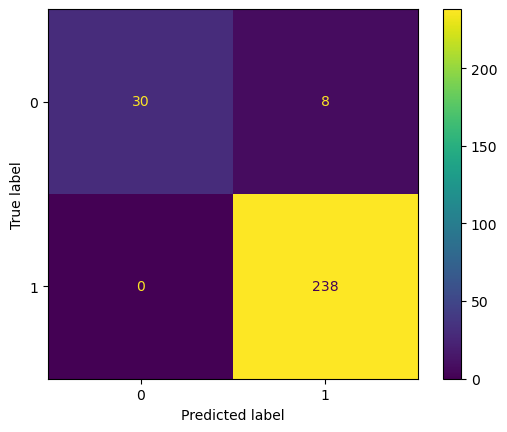

In [91]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y);

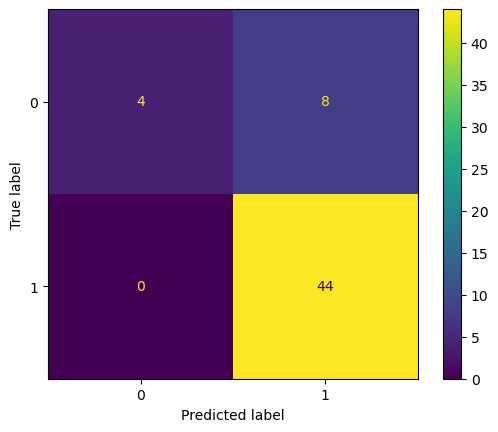

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

**Using slicing to get the tp val**

In [93]:
y_predicted = clf.predict_proba(X_test)
y_predicted[:5], y_predicted.ndim

(array([[0.67, 0.33],
        [0.01, 0.99],
        [0.07, 0.93],
        [0.07, 0.93],
        [0.8 , 0.2 ]]),
 2)

In [95]:
y_predicted_pos=y_predicted[:,1]
y_predicted_pos[:5]

array([0.33, 0.99, 0.93, 0.93, 0.2 ])

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_pos)

In [97]:
def plot_roc_curve(fpr,tpr):

 plt.plot(fpr, tpr, color='orange', label='ROC')
 plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')


 plt.xlabel('False positive rate(fpr)')
 plt.ylabel('True positive rate(tpr')
 plt.title('Receiving operating characteristic (ROC) curve')
 plt.legend()
 plt.show()